In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['MSFT','^GSPC']
df = pd.DataFrame()
for a in assets:
    df[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-01-01')['Adj Close']

In [3]:
df.tail()

,MSFT,^GSPC
Date,,
2020-07-31,205.009995,3271.120117
2020-08-03,216.539993,3294.610107
2020-08-04,213.289993,3306.510010
2020-08-05,212.940002,3327.770020
2020-08-06,216.350006,3349.159912


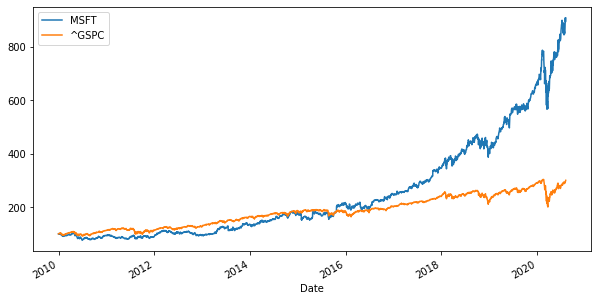

In [4]:
(df/df.iloc[0]*100).plot(figsize = (10,5))

In [5]:
log_returns = np.log(df/df.shift(1))

In [6]:
log_returns.head()

,MSFT,^GSPC
Date,,
2009-12-31,NaN,NaN
2010-01-04,0.015302,0.015916
2010-01-05,0.000323,0.003111
2010-01-06,-0.006156,0.000545
2010-01-07,-0.010454,0.003993


In [7]:
log_returns.mean() * 250

MSFT     0.206668
^GSPC    0.103090
dtype: float64

In [8]:
log_returns.cov() * 250

,MSFT,^GSPC
MSFT,0.063054,0.032891
^GSPC,0.032891,0.030616


In [9]:
log_returns.corr()

,MSFT,^GSPC
MSFT,1.000000,0.748581
^GSPC,0.748581,1.000000


In [10]:
num_assets = len(assets)

In [11]:
num_assets

2

In [12]:
weights = np.random.random(num_assets) #any 2 numbers between 0 and 1 these are the weights of the 2 assets and should add upto 1
weights /= np.sum(weights)
weights

array([0.4633269, 0.5366731])

In [13]:
weights[0] + weights[1]       #these 2 weights should add upto 1 and represent weight of stock and index respectively

0.9999999999999999

In [14]:
np.sum(weights *log_returns.mean()) * 250     #expected portfolio return using this portfolio combination

0.15108063431321683

In [15]:
np.dot(weights.T, np.dot(log_returns.cov() *250 , weights))        #expected portfolio variance

0.03871090249473347

In [16]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() *250 , weights)))  #expected portfolio volatility

0.19675086402537975

In [17]:
port_returns = []
port_volatility = []
for x in range(1000):          #1000 combinations of different weights of stock and index are tried
    weights = np.random.random(num_assets) #any 2 numbers between 0 and 1 these are the weights of the 2 assets and should add upto 1
    weights /= np.sum(weights)
    port_returns.append(np.sum(weights *log_returns.mean()) * 250)
    port_volatility.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() *250 , weights))))
port_returns = np.array(port_returns)
port_volatility = np.array(port_volatility)    
port_returns, port_volatility    

(array([0.16049652, 0.16906745, 0.14913162, 0.18261296, 0.1851107 ,
        0.12857399, 0.18249456, 0.15508343, 0.16167072, 0.18126499,
        0.15332848, 0.14451892, 0.13881604, 0.13058055, 0.10572809,
        0.16497638, 0.1246799 , 0.19928868, 0.13756361, 0.11609749,
        0.15561365, 0.17166771, 0.14730029, 0.17006408, 0.13068693,
        0.14475207, 0.15223955, 0.19729079, 0.14561987, 0.16418897,
        0.11913464, 0.16565591, 0.16174286, 0.1305008 , 0.15068646,
        0.16950549, 0.12256376, 0.13917216, 0.19187514, 0.14625255,
        0.17474682, 0.13832785, 0.16178139, 0.18215318, 0.16023091,
        0.10552943, 0.16391144, 0.12388112, 0.16062763, 0.13780308,
        0.14510598, 0.11639697, 0.17589512, 0.15995627, 0.14850887,
        0.15456925, 0.16869913, 0.18399286, 0.15092861, 0.13960601,
        0.11230686, 0.16130904, 0.1519058 , 0.20215177, 0.1566015 ,
        0.18496248, 0.14649754, 0.13287474, 0.14227337, 0.13239479,
        0.19020818, 0.15255712, 0.17024116, 0.15

In [18]:
portfolio = pd.DataFrame({'Return':port_returns , 'Volatility': port_volatility})

In [19]:
portfolio.head()      #now we shall plot a graph for different risk vs different returns for the above combinations

,Return,Volatility
0,0.160497,0.204216
1,0.169067,0.211730
2,0.149132,0.195317
3,0.182613,0.224829
4,0.185111,0.227391


Text(0, 0.5, 'Expected Returns')

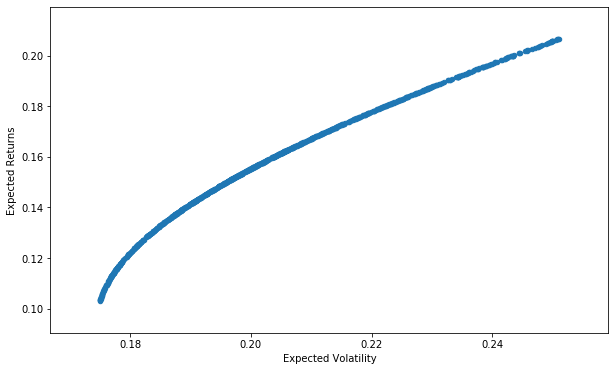

In [20]:
portfolio.plot(x = 'Volatility', y = 'Return', kind = 'scatter' , figsize=(10,6)) ;
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')

In [21]:
#clearly as expected volatility/risk increases expected returns also increases